### 상관계수 ( Correlation Coefficient )
- numpy를 이용하여 데이터의 상관계수를 구합니다.
- python 코드와 numpy의 함수의 속도차이를 비교합니다.

#### Index

1. 분산
1. 공분산
1. 상관계수
1. 결정계수
1. 프리미어리그 데이터 상관계수 분석

In [1]:
import numpy as np

샘플 데이터 생성

In [2]:
data1 = np.array([80, 85, 100, 90, 95])
data2 = np.array([70, 80, 100, 95, 95])

#### 1. 분산(variance)
- 1개의 이산정도를 나타냄
- 편차제곱의 평균

$ variance = \frac{\sum_{i=1}^n{(x_i-\bar{x})^2}}{n}, (\bar{x}:평균) $

In [8]:
# variance code
def variance(datas):
    var = 0
    x_ = np.mean(datas)
    for data in datas:
        var += (data - x_) ** 2
    return var / len(datas)

In [11]:
variance(data1), variance(data2), variance(data1) ** 0.5, variance(data2) ** 0.5

(50.0, 126.0, 7.0710678118654755, 11.224972160321824)

In [13]:
np.var(data1), np.var(data2), np.std(data1), np.std(data2)

(50.0, 126.0, 7.0710678118654755, 11.224972160321824)

일반 함수와 numpy 함수의 퍼포먼스 비교

In [15]:
p_data1 = np.random.randint(60, 100, int(1E5))
p_data2 = np.random.randint(60, 100, int(1E5))

In [17]:
%%time
variance(p_data1), variance(p_data2)

CPU times: user 574 ms, sys: 158 µs, total: 574 ms
Wall time: 577 ms


(133.70904629761978, 133.5019457663978)

In [18]:
%%time
np.var(p_data1), np.var(p_data2)

CPU times: user 1.56 ms, sys: 132 µs, total: 1.69 ms
Wall time: 3.22 ms


(133.70904629760005, 133.5019457664)

#### 2. 공분산(covariance)
- 2개의 확률변수의 상관정도를 나타냄
- 평균 편차곱
- 방향성은 보여줄수 있으나 강도를 나타내는데 한계가 있다
    - 표본데이터의 크기에 따라서 값의 차이가 큰 단점이 있다

$ covariance = \frac{\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{n-1}, (\bar{x}:x의 평균, \bar{y}:y의 평균) $

In [19]:
# covariance function

In [24]:
data1 = np.array([80, 85, 100, 90, 95])
data2 = np.array([70, 80, 100, 95, 95])
data3 = np.array([100, 90, 70, 90, 80])

In [25]:
np.cov(data1, data2)[0, 1], np.cov(data1, data3)[0, 1]

(93.75, -87.5)

In [26]:
data4 = data1 * 10
data5 = data3 * 10
data4, data5

(array([ 800,  850, 1000,  900,  950]), array([1000,  900,  700,  900,  800]))

In [27]:
np.cov(data4, data5)[0, 1]s

(-8750.0, -8750.0)

#### 3. 상관계수(correlation coefficient)
- 공분산의 한계를 극복하기 위해서 만들어짐
- -1 ~ 1까지의 수를 가지며 0과 가까울수록 상관도가 적음을 의미
- x의 분산과 y의 분산을 곱한 결과의 제곱근을 나눠주면 x나 y의 변화량이 클수록 0에 가까워짐
- https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.corrcoef.html

$ correlation-coefficient = \frac{공분산}{\sqrt{{x분산} \cdot {y분산}}} $

최종 상관계수

$ r = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{{\sum(x-\bar{x})^2}\cdot{\sum(y-\bar{y})^2}}} $

In [29]:
np.corrcoef(data1, data3)[0, 1],\
np.corrcoef(data1, data2)[0, 1],\
np.corrcoef(data4, data5)[0, 1]

(-0.970725343394151, 0.9449111825230682, -0.970725343394151)

#### 4. 결정계수(cofficient of determination: R-squared)
- x로부터 y를 예측할수 있는 정도
- 상관계수의 제곱 (상관계수를 양수화)
- 수치가 클수록 회기분석을 통해 예측할수 있는 수치의 정도가 더 정확

In [34]:
np.corrcoef(data1, data2)[0, 1] ** 2, np.corrcoef(data1, data3)[0, 1] ** 2

(0.892857142857143, 0.9423076923076923)

#### 5. 프리미어리그 데이터 상관계수 분석
- 2016년 프리미어리그 성적에서 득점과 실점 데이터중에 승점에 영향을 더 많이 준 데이터는?

In [8]:
import pickle

In [9]:
%ls datas

advertising.plk   premierleague.csv  train.csv
article_1200.csv  premierleague.pkl


In [10]:
with open("datas/premierleague.pkl", "rb") as file:
    datas = pickle.load(file)

In [11]:
datas[:2]

array([['Manchester City', 106, 27, 100],
       ['Manchester United', 68, 28, 81]], dtype=object)

In [12]:
# 득점
gf = datas[:, 1].astype(np.int)

# 실점
ga = datas[:, 2].astype(np.int)

# 승점
point = datas[:, 3].astype(np.int)

gf, ga, point

(array([106,  68,  74,  84,  62,  74,  36,  44,  56,  39,  45,  45,  48,
         44,  34,  28,  37,  28,  35,  31]),
 array([27, 28, 36, 38, 38, 51, 39, 58, 60, 47, 55, 61, 68, 64, 54, 58, 56,
        56, 68, 56]),
 array([100,  81,  77,  75,  70,  63,  54,  49,  47,  44,  44,  44,  42,
         41,  40,  37,  36,  33,  33,  31]))

In [6]:
np.corrcoef(gf, point)[0, 1] ** 2, np.corrcoef(ga, point)[0, 1] ** 2

(0.8683266496886471, 0.757933920368845)

In [7]:
# 프리미어리그 데이터를 이용한 간단한 선형회귀

In [14]:
from sklearn.linear_model import LinearRegression

In [19]:
# 데이터 전처리
gf, ga, point

(array([106,  68,  74,  84,  62,  74,  36,  44,  56,  39,  45,  45,  48,
         44,  34,  28,  37,  28,  35,  31]),
 array([27, 28, 36, 38, 38, 51, 39, 58, 60, 47, 55, 61, 68, 64, 54, 58, 56,
        56, 68, 56]),
 array([100,  81,  77,  75,  70,  63,  54,  49,  47,  44,  44,  44,  42,
         41,  40,  37,  36,  33,  33,  31]))

In [17]:
# 모델 학습

In [22]:
# 득점 데이터 모델
model_1 = LinearRegression().fit(gf.reshape(-1, 1), point)

# 실점 데이터 모델
model_2 = LinearRegression().fit(ga.reshape(-1, 1), point)

In [23]:
# 예측 및 평가

In [30]:
# 득점으로 만들 모델의 예측 결과
pred_1 = model_1.predict(gf.reshape(-1, 1))
pred_1 = np.round(pred_1).astype(np.int)
gf, point, pred_1

(array([106,  68,  74,  84,  62,  74,  36,  44,  56,  39,  45,  45,  48,
         44,  34,  28,  37,  28,  35,  31]),
 array([100,  81,  77,  75,  70,  63,  54,  49,  47,  44,  44,  44,  42,
         41,  40,  37,  36,  33,  33,  31]),
 array([99, 67, 72, 80, 62, 72, 39, 46, 56, 42, 47, 47, 50, 46, 38, 33, 40,
        33, 39, 35]))

In [31]:
# 실점으로 만들 모델의 예측 결과
pred_2 = model_2.predict(ga.reshape(-1, 1))
pred_2 = np.round(pred_2).astype(np.int)
ga, point, pred_2

(array([27, 28, 36, 38, 38, 51, 39, 58, 60, 47, 55, 61, 68, 64, 54, 58, 56,
        56, 68, 56]),
 array([100,  81,  77,  75,  70,  63,  54,  49,  47,  44,  44,  44,  42,
         41,  40,  37,  36,  33,  33,  31]),
 array([84, 83, 72, 69, 69, 52, 68, 43, 40, 57, 47, 39, 29, 35, 48, 43, 45,
        45, 29, 45]))

In [39]:
# 모델 평가

- MAE : sum(|pred - real|) / n

In [42]:
np.sum(np.absolute(pred_1 - point)) / len(point)

5.5

In [43]:
np.sum(np.absolute(pred_2 - point)) / len(point)

8.05

In [44]:
# 시각화

In [45]:
%matplotlib inline
%config InlineBackend.figure_formats = {"png", "retina"}

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt

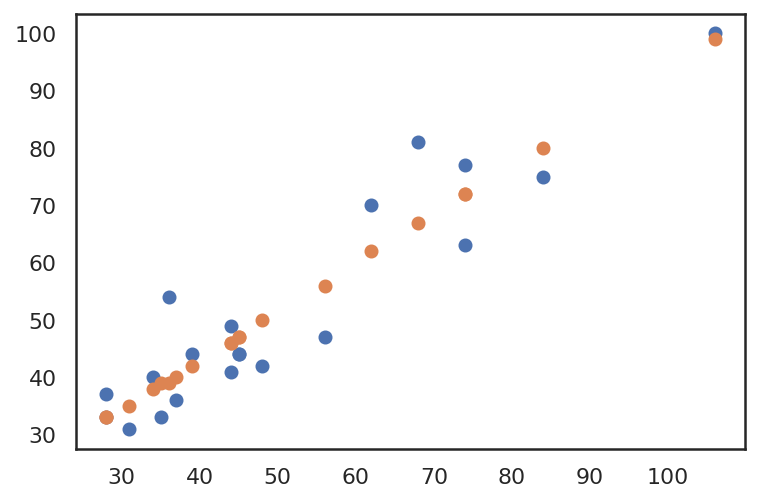

In [47]:
# 득점데이터
plt.scatter(gf, point)  # 파랑색
plt.scatter(gf, pred_1) # 주황색

In [49]:
# y = 0.85*x + 8.69
model_1.coef_, model_1.intercept_

(array([0.85195959]), 8.685257008786401)

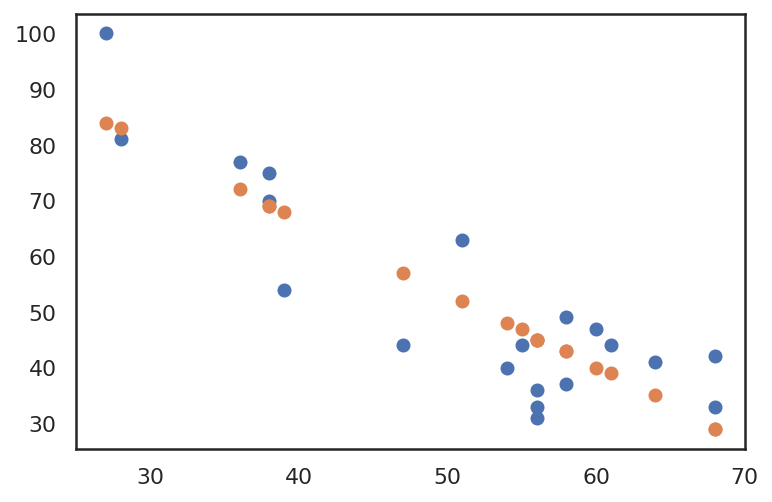

In [51]:
# 득점데이터
plt.scatter(ga, point)  # 파랑색
plt.scatter(ga, pred_2) # 주황색

In [52]:
# y = -1.33*x + 120.18
model_2.coef_, model_2.intercept_

(array([-1.33858081]), 120.18376328796803)

#### 광고 데이터의 광고 효과 확인 및 예측
- tv, radio, newspaper, sales(target)
- 각 매체별 상관계수를 구하기
- 각 매체별 회귀분석 모델 만들기 및 평가

In [53]:
import pickle

In [55]:
with open("datas/advertising.plk", "rb") as file:
    datas = pickle.load(file)

In [57]:
datas[:5]

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,   9.3],
       [151.5,  41.3,  58.5,  18.5],
       [180.8,  10.8,  58.4,  12.9]])

In [58]:
# 매체별 상관계수 및 결정계수 출력

In [64]:
# 데이터 전처리 > 데이터 8:2로 나누기

In [112]:
rate = 0.3
idx = int(len(datas) * rate)
len(datas), idx

(200, 60)

In [113]:
train_x_tv = datas[:-idx, 0]
train_x_radio = datas[:-idx, 1]
train_x_newspaper = datas[:-idx, 2]
train_y = datas[:-idx, -1]

test_x_tv = datas[-idx:, 0]
test_x_radio = datas[-idx:, 1]
test_x_newspaper = datas[-idx:, 2]
test_y = datas[-idx:, -1]

In [114]:
# 매체별 회귀분석 모델 생성

In [115]:
model_tv = LinearRegression().fit(train_x_tv.reshape(-1, 1), train_y)

In [116]:
model_radio = LinearRegression().fit(train_x_radio.reshape(-1, 1), train_y)

In [117]:
model_newspaper = LinearRegression().fit(train_x_newspaper.reshape(-1, 1), train_y)

In [118]:
# 모델 평가 : MAE : sum(|pred-test|) / n

In [119]:
pred_tv = model_tv.predict(test_x_tv.reshape(-1, 1))
pred_tv = np.round(pred_tv, 1)
mae_tv = np.sum(np.absolute(pred_tv - test_y)) / len(test_y) 
mae_tv

2.885

In [120]:
pred_radio = model_radio.predict(test_x_radio.reshape(-1, 1))
pred_radio = np.round(pred_radio, 1)
mae_radio = np.sum(np.absolute(pred_radio - test_y)) / len(test_y) 
mae_radio = np.round(mae_radio, 3)
mae_radio

3.052

In [121]:
pred_newspaper = model_newspaper.predict(test_x_newspaper.reshape(-1, 1))
pred_newspaper = np.round(pred_newspaper, 1)
mae_newspaper = np.sum(np.absolute(pred_newspaper - test_y)) / len(test_y) 
mae_newspaper = np.round(mae_newspaper, 3)
mae_newspaper

3.888

In [123]:
# 0.2
# mae_tv: 3.085, mae_radio : 3.03, mae_newspaper: 3.905
# mae_radio

In [124]:
# 0.3
# mae_tv: 2.885, mae_radio : 3.052, mae_newspaper: 3.888

In [103]:
# 상관계수

In [111]:
np.corrcoef(datas[:, 0], datas[:, -1])[0, 1],\
np.corrcoef(datas[:, 1], datas[:, -1])[0, 1],\
np.corrcoef(datas[:, 2], datas[:, -1])[0, 1],

(0.7822244248616061, 0.5762225745710551, 0.22829902637616528)

In [125]:
# 모델 생성시 모든 feature 사용

In [126]:
train_x = datas[:-idx, :-1]
train_y = datas[:-idx, -1]
test_x = datas[-idx:, :-1]
test_y = datas[-idx:, -1]

model = LinearRegression().fit(train_x, train_y)

In [128]:
pred_y = model.predict(test_x)
pred_y = np.round(pred_y, 1)
mae = np.sum(np.absolute(pred_y - test_y)) / len(test_y) 
mae = np.round(mae, 3)
mae

1.245

In [129]:
np.corrcoef(datas[:, 0], datas[:, -1])[0, 1] ** 2,\
np.corrcoef(datas[:, 1], datas[:, -1])[0, 1] ** 2,\
np.corrcoef(datas[:, 2], datas[:, -1])[0, 1] ** 2,

(0.6118750508500705, 0.33203245544529514, 0.05212044544430501)

In [131]:
sample = np.array([[100,  20,  200]])
model.predict(sample)

array([10.74255704])